In [1]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

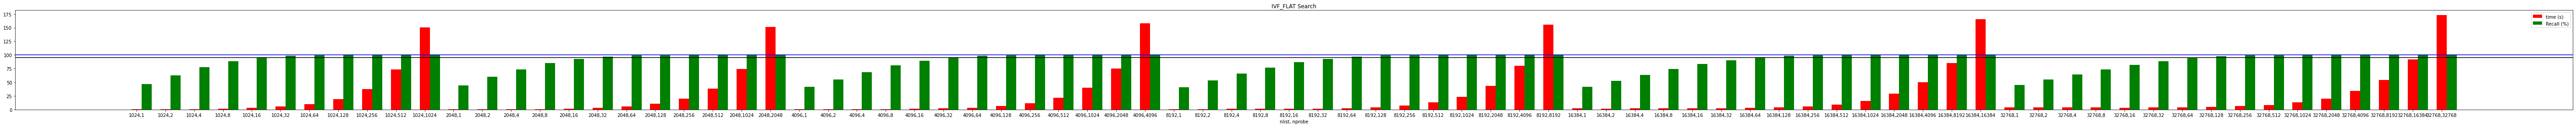

In [19]:
data = pd.read_csv('~/Desktop/bench_parameter_tuning_ivfflat_v2.csv', skiprows=10)
df = pd.DataFrame(data)
df.filter(like='Search', axis=0)

nlist = list(df["nlist"]) # X0
nprobe = list(df["nprobe"]) # X1
nlist_nprobe = nlist
nlist_nprobe[:] = [str(x) + "," + str(nprobe[index]) for index,x in enumerate(nlist_nprobe)]

time = list(df["real_time"]) # Y0
time[:] = [x /1000.0/1000.0/1000.0 for x in time] # unit: second
recall = list(df["Recall"]) # Y1
recall[:] = [x * 100 for x in recall] # unit: MiB
  
      
f = plt.figure()
f.set_figwidth(100)
plt.axhline(y = 100, color = 'blue', linestyle = '-')
plt.axhline(y = 95, color = 'black', linestyle = '-')

# Plot the data using bar() method
x = np.arange(len(nlist))
plt.bar(x, time, width=0.35, label='time (s)', color='r', tick_label=nlist_nprobe)
plt.bar(x + 0.35, recall, width=0.35, label='Recall (%)', color='g')

plt.title("IVF_FLAT Search")
plt.xlabel("nlist, nprobe")
# plt.ylabel("Y NAME")
  
# Show the plot
plt.legend()
plt.show()